Softmax regression, also known as multinomial logistic regression, is an extension of logistic regression used when the output has more than two classes. It functions similarly to logistic regression but is designed to handle multi-class classification problems.

<img src="https://images.contentstack.io/v3/assets/bltac01ee6daa3a1e14/blte5e1674e3883fab3/65ef8ba4039fdd4df8335b7c/img_blog_image1_inline_(2).png?width=1024&disable=upscale&auto=webp"/>

For example, suppose we have 3 output classes and 3 input features. In this case, the model will calculate 3 + 1 coefficients (3 weights and 1 bias) for each class, resulting in a total of 4 parameters per class. These are used to compute the raw outputs (logits), one for each class. These logits are then passed through the softmax function, as shown in the diagram above under the "output layer," to convert them into probabilities. The model then predicts the class corresponding to the highest probability.

One way to handle multi-class classification using softmax regression is by applying one-hot encoding to the output (target) column. In this approach, each class label is converted into a binary vector where only the index corresponding to the class is marked as 1 and the rest are 0. For example, if there are three classes — Class 0, Class 1, and Class 2 — the labels would be transformed as follows: 0 → [1, 0, 0], 1 → [0, 1, 0], and 2 → [0, 0, 1]. This encoding allows the model to treat the classification task as a probability distribution problem. The softmax function is then used in the final layer of the model to output a probability vector for each instance, where each value represents the predicted probability of the input belonging to a particular class. The class with the highest probability is selected as the model’s prediction. This process makes it possible for the model to learn distinct weights for each class and output interpretable probabilistic predictions in multi-class settings.

but in this method we have to create a large no of features if large dataset 

so we modify our loss function

new loss fuction is 

<img src="../../images/mll.png">

where k - no of classes in output

      m - no of rows in input
      
      y_hat = output of softmax function for a corresponding y_pred  

In [23]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [35]:
# for plotting we can take only two features
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [28]:
clf = LogisticRegression(multi_class='multinomial')

In [29]:
clf.fit(X_train,y_train)

C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [30]:
y_pred = clf.predict(X_test)

In [31]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  4,  4],
       [ 0,  2,  6]])

C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

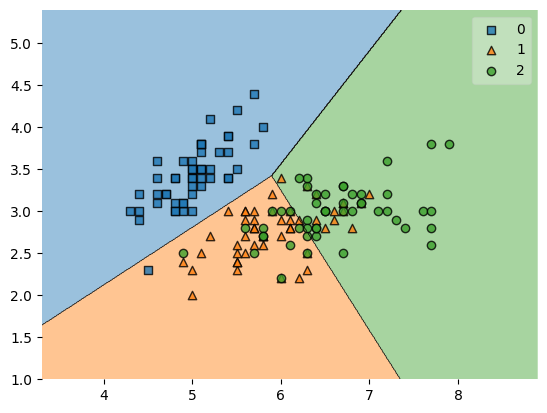

In [34]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,clf)

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
# print(spambase.metadata) 
  
# # variable information 
# print(spambase.variables) 


In [7]:
X.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [4]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0
